In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import math 
import scipy as sp
import numpy as np

In [4]:
data="myRecording02-copy.wav"
ipd.Audio(data)

data1="myRecording02.wav"

# Signal 

Text(0, 0.5, 'Amplitude')

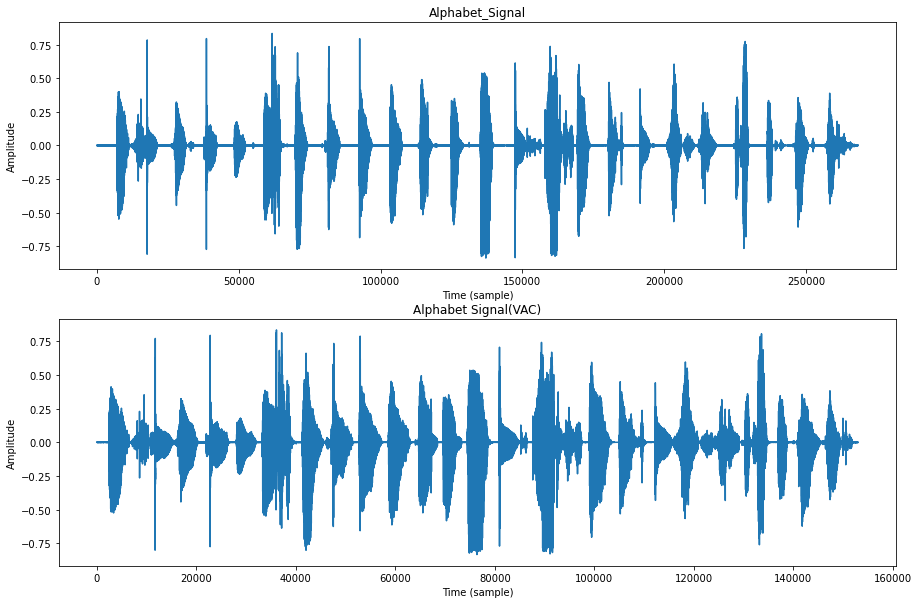

In [8]:
y,sr=librosa.load(data1,sr=8000)
y1,sr=librosa.load(data,sr=8000)
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.plot(y)
plt.title('Alphabet_Signal')
plt.xlabel('Time (sample)')
plt.ylabel('Amplitude')


plt.subplot(2,1,2)
plt.plot(y1)
plt.title('Alphabet Signal(VAC)')
plt.xlabel('Time (sample)')
plt.ylabel('Amplitude')

In [4]:
#Real Time System work on sr=8k 
sr

8000

In [4]:
y1[0:26]

array([-8.0486236e-05, -3.0901152e-04, -2.4260557e-04,  4.5810706e-05,
        1.8282168e-04,  1.6824297e-04, -1.3037349e-04,  1.6218131e-05,
        4.0990679e-04,  3.3783910e-04,  2.0596875e-04, -2.3146310e-04,
       -2.2857211e-04, -2.0984240e-04, -5.6378805e-04, -6.3791050e-04,
       -6.8453891e-04, -7.8762253e-04, -4.7929600e-04, -6.3812861e-04,
       -1.2068750e-03, -1.2085321e-03, -5.9955911e-04, -5.2421750e-04,
       -8.3723263e-04, -2.7014699e-04], dtype=float32)

# Spectrum 

In [9]:
# n_fft is no. of samples in each frame 
n_fft=1024
FRAME_SIZE =200  # 25ms
HOP_SIZE=80      # 10ms

(513, 2)


Text(0, 0.5, 'Amp')

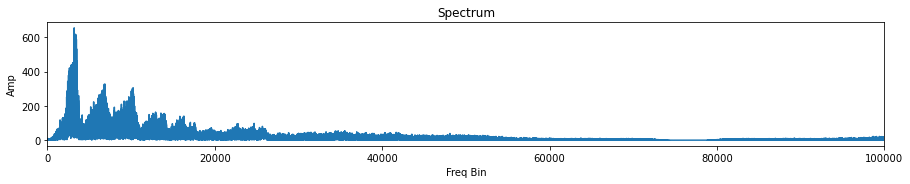

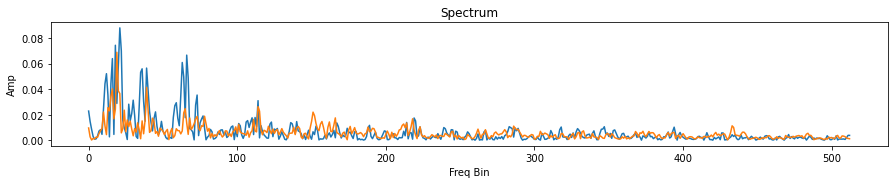

In [10]:
# FFT Spectrum 

spectrum= np.abs(np.fft.fft(y1))
plt.figure(figsize=(15,5))
plt.subplot(2,1,1)
plt.plot(spectrum)
plt.title('Spectrum')
plt.xlabel('Freq Bin')
plt.ylabel('Amp')
plt.xlim(0,100000)


# STFT Spectum
Y1=librosa.stft(y1[:n_fft], n_fft=1024 , window='hamm', hop_length= 512+1)
print(Y1.shape) 

ft1=np.abs(Y1) 
plt.figure(figsize=(15, 5))
plt.subplot(2,1,2)
plt.plot(ft1)
plt.title('Spectrum')
plt.xlabel('Freq Bin')
plt.ylabel('Amp')


# Dft  to Stft 

Dft -> x(k) = summ( x(n)*exp(-i2*pi*n*k/N) ) for n={0,1,2...N-1}

out -> spectral vector (# frequency bins)  
       N complex Fourier Coefficient ( 1D array ) 

Stft-> s(m,k)= summ(x(n+ mH)* w(n) *exp(-i2*pi*n*k/N) )  for n={0,1,2...N-1}
      
        mH -> starting samples of current frames 
        n-> varies to cover all samples in the frames 
        w(n)-> is windowing function ( bell shaped window )
        
 out -> spectral matrix (#frequency Bins , #frames )
        complex fourier Coefficient 
        
  we get complex fourier coefficient for each frequecy bins that we are considering for each frame
  
      #frequency bins = framesize /2 +1  (due to symmetry in DFT )
      
      #frames =(samples -framesize)/hopsize +1

In [11]:
def dft_custom(xn):
    N = xn.shape[0]
    e_matrix = np.fromfunction(lambda m, n: np.exp(-(2*np.pi*m*n*1j)/N), (N, N))
    return e_matrix.dot(xn)

def stft(xn , window_size=None, hopsize=HOP_SIZE, window = 'hamming', fft_size=n_fft ):
    total_samples = xn.shape[0]
    
    if window_size == None:
        window_size = fft_size
    
    if hopsize == None:
        hopsize = int(fft_size/4)

    window_fn = sp.signal.get_window(window, Nx=fft_size)
    
    start_index = 0 - hopsize
    end_index = window_size - hopsize
    
    stft_res = []
    counter = 0
    
    while start_index + hopsize <= total_samples - window_size:
        start_index = start_index + hopsize
        end_index = end_index + hopsize
        
        x_window = xn[start_index:end_index]
        diff = fft_size - window_size
        
        if diff %2==0:
            
            x_window = np.pad(x_window, (int(diff/2), (int(diff/2))))
            
        else:
            
            x_window = np.pad(x_window, (int(diff/2), (int(diff/2)+1)))
        
        try:
        
            mult_window = x_window * window_fn
        
        except:
            print(start_index)
            print(end_index)
                    
        dft_window = dft_custom(mult_window)[:int(fft_size/2)+1]
        stft_res.append(dft_window)
        counter+=1
    
    return np.array(stft_res)

In [16]:
STFT = stft(y1, window_size= FRAME_SIZE, hopsize=HOP_SIZE, fft_size=n_fft)


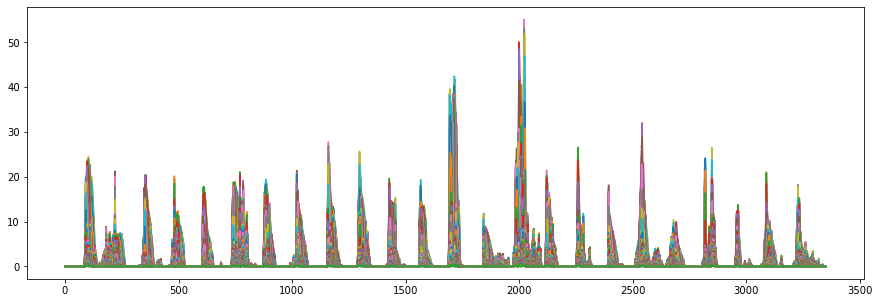

In [24]:
plt.figure(figsize=(15,5))
plt.plot(np.abs(STFT))
#librosa.display.specshow(STFT , sr=sr , x_axis='time' , y_axis='linear' )

# Tempo , Frames & Beat 

E:\Anaconda\lib\site-packages\librosa\filters.py:238: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn(


beat-: [ 0.96   2.304  3.584  4.864  6.144  7.424  8.832 10.24  11.648 12.992
 14.336 15.68  17.024 18.496 19.84  21.248 22.592 24.    25.344 26.752
 28.224 29.632 30.912]
tempo-: 44.642857142857146


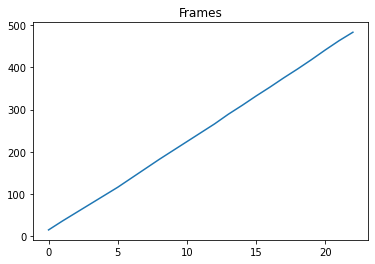

In [7]:
tempo, frames = librosa.beat.beat_track(y=y1,sr=sr)
beat_times = librosa.frames_to_time(frames,sr=sr)

#plt.plot(beat_times)
plt.plot(frames)
plt.title('Frames')
print("beat-:", beat_times)
print("tempo-:" ,tempo)

# Zero Crossing Rate
Zero-crossing rate is a measure of number of times in a given time interval/frame that the amplitude of the speech signals passes through a value of zero. This feature has been used heavily in both speech recognition and music information retrieval, being a key feature to classify percussive sounds. It is also extensively used in a wide range of other audio application domains, such as musical genre classification, highlight detection, speech analysis, singing voice detection in music, and environmental sound recognition. The simplest method to distinguish between voiced and unvoiced speech is to analyze the zero crossing rate. A large number of zero crossings implies that there is no dominant low-frequency oscillation.

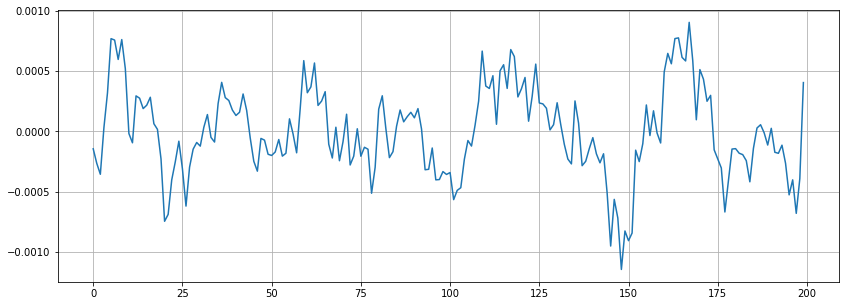

In [42]:
n0 = 1000
n1 = 1200
plt.figure(figsize=(14, 5))
plt.plot(y1[n0:n1])
plt.grid()

In [41]:
ZCR = librosa.zero_crossings(y1[n0:n1], pad=False)
print(sum(ZCR))

37


# Spectrogram 
 It is a 2D representaion which tell us about how certain frequencies are present at each piont in time .
 
 * Time-frequecy represenation 
 * Perceptually-relavant amplitude representaion 
 
 
 
# Hop size
No. of samples that we can slide to the right when we want to take a new frame 

This must be fraction of framesize ( 1/2 k , 1/4 k ...)

# windowing  

xw(k) = x(k) * w(k) 
* window size = frame size 


we use "bell shaped window" 
      
### Hann Window 
     w(k) = 0.5( 1- cos(2*pi*k /(K-1) )  where k ={ 1, 2 , ...K )
     
### Hamm Window 
     w(k) =0.54-0.46*cos(2*pi*k/(K-1))   where k=( 1, 2 , ...K )

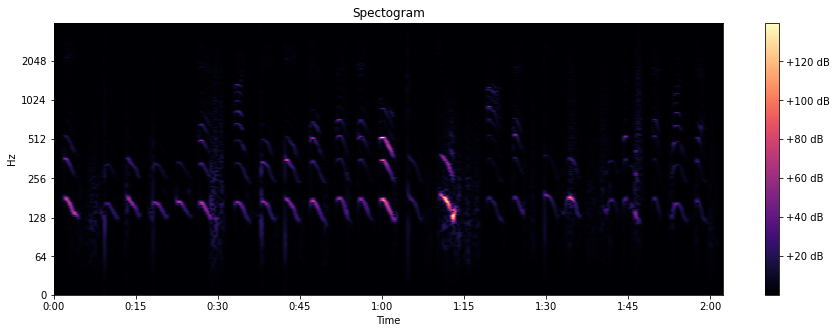

In [15]:
spec1= np.abs(librosa.stft(y1, hop_length=HOP_SIZE))

#def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):

plt.figure(figsize=(15,5))
librosa.display.specshow(spec1 , sr=sr , x_axis='time' , y_axis='log' )
plt.title('Spectogram')
plt.colorbar(format='%+2.0f dB')
    
    

#plot_spectrogram(y1, sr, HOP_SIZE)

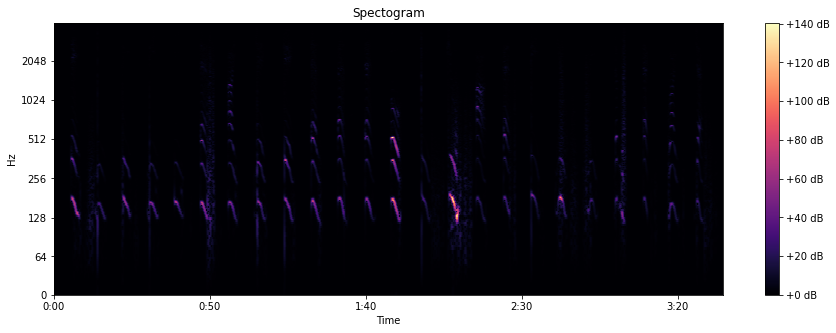

In [16]:
spec= np.abs(librosa.stft(y, hop_length=HOP_SIZE))

#def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
plt.figure(figsize=(15,5))
librosa.display.specshow(spec , sr=sr , x_axis='time' , y_axis='log' )
plt.title('Spectogram')
plt.colorbar(format='%+2.0f dB')

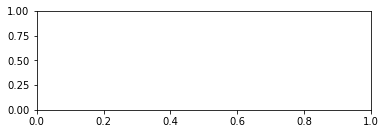

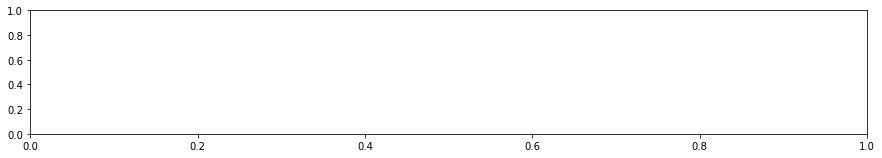

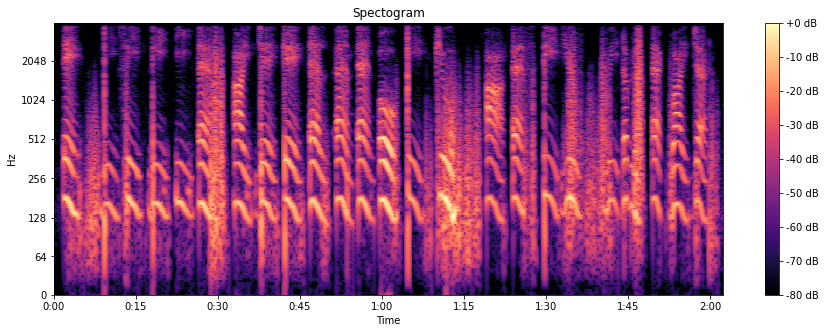

In [19]:
def SPECTROGRAM(signal):
    plt.figure(figsize=(15,5))
    signal=librosa.amplitude_to_db(signal,ref=np.max)
    librosa.display.specshow(signal, sr=sr , x_axis='time' , y_axis='log' )
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectogram')

plt.subplot(2,1,1)
SPECTROGRAM(spec)
SPECTROGRAM(spec1)

Text(0.5, 1.0, 'Spectrogram (using VAC)')

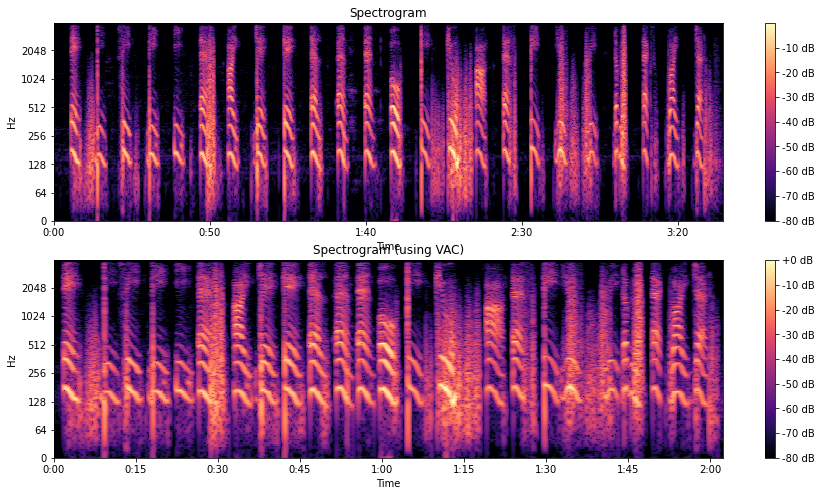

In [23]:
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
#plt.figure(figsize=(15,5))
signal=librosa.amplitude_to_db(spec,ref=np.max)
librosa.display.specshow(signal, sr=sr , x_axis='time' , y_axis='log' )
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')

plt.subplot(2,1,2)
signal1=librosa.amplitude_to_db(spec1,ref=np.max)
librosa.display.specshow(signal1, sr=sr , x_axis='time' , y_axis='log' )
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (using VAC)')

# Mel Spectrogram 
Mel spectrogram is a spectrogram where the frequencies are converted to the mel scale.

* Time frequency representation
* Perceptually-relavant amplitude representation 
* perceptually-relavant frequency representation 

#### Mel Scale 
    m=2595*log(1+f/500)
    
    f =700(10^(m/2595) -1)

# Steps to Extract Mel Spectrogram 
    
### 1) Extract STFT 

### 2 ) Convert amplitude to dbs 

### 3 ) Convert frequency to mel 
    
   #### 1) How may mel-bands ? 
   It is a hyper-parameter depend upon our algorithm & deep learning Algorithm 
   
   #### 2) Construction of mel filter banks 
    i) convert low/high frq to mel (m=2595*log(1+f/500) )
    ii)create #bands eqaully spaced piont 
    iii)convert points back to Hertz 
    iv) Round to nearest frequency bin 
    v) create triangle Filter
  
  
  
   #### 3) Apply mel filter banks to spectrogram 
      Mel filter Bank Shape 
      M=(#bands , #framesize/2 +1 )
      Y=(#framesize/2 +1 , #frames )
  
      mel_spec = MY   (convert frequency from Hertz to melbourne's )
      
      ![Capture.JPG](attachment:Capture.JPG)

In [10]:
def preemphasis(xn, alpha = 0.97):
    # Using pre-empaphases with a certain alpha
    pre_e_xn = np.zeros((xn.shape))
    
    pre_e_xn[0] = xn[0]
    
    pre_e_xn[1:] = xn[1:] - alpha * xn[:-1]
    
    return pre_e_xn

def get_mel_from_hertz(hertz):
    return 2595 * np.log10(1 + (hertz/ 700))

def get_hertz_from_mel(mel):
    return 700 * (10**(mel / 2595) - 1)

def get_power_spectrum(xn_mag, fft_size=1024):
    return (1/fft_size) * np.power(xn_mag, 2)


def get_triangle_function(prev_freq, cur_freq, nex_freq, filter_banks, bin_fb):
    
    # Ascending Triangle
    
    for freq in range(int(prev_freq), int(cur_freq)):
        
        filter_banks[bin_fb-1,freq] = (freq - prev_freq)/(cur_freq-prev_freq)
        
    # Descending Triangle
    
    for freq in range(int(cur_freq+1), int(nex_freq)):
        
        filter_banks[bin_fb-1, freq] = (nex_freq-freq)/(nex_freq-cur_freq)
        
    # Triangle Tip
    
    filter_banks[bin_fb-1, int(cur_freq)] = 1
    
    return filter_banks


def mel_filter_banks(xn_pow, sr, number_filters, fft_size=1024):
    min_mel = 0
    max_mel = get_mel_from_hertz(sr/2)
    
    mel_freq_points = np.linspace(min_mel, max_mel, num=number_filters+2)
    hertz_freq_points = get_hertz_from_mel(mel_freq_points)
    
    corresponding_bins_hertz_points = np.floor((fft_size + 1) * hertz_freq_points / sr)
    
    # Filter banks have to be of shape number_filters * (fft_size/2) + 1
    filter_banks = np.zeros((number_filters, int(fft_size/2)+1))
    
    for bin_fb in range(1, number_filters+1):
        
        prev_bin = corresponding_bins_hertz_points[bin_fb-1]
        current_bin = corresponding_bins_hertz_points[bin_fb]
        next_bin = corresponding_bins_hertz_points[bin_fb+1]
        
        # Use the triangle function to get the values of the banks
        
        filter_banks = get_triangle_function(prev_bin, current_bin, next_bin, filter_banks, bin_fb)
        
    return filter_banks

def x_power(xn,window_size,hopsize,fft_size):
    xn = preemphasis(xn)
    xn_stft = stft(xn, window_size= window_size, hopsize=hopsize, fft_size=fft_size)
    xn_mag = np.abs(xn_stft)
    xn_pow = get_power_spectrum(xn_mag, fft_size=fft_size)
    return xn_pow 



In [25]:
Xpow=x_power(y1,FRAME_SIZE,HOP_SIZE,n_fft)

In [26]:
filter_banks=mel_filter_banks(Xpow,sr,22)

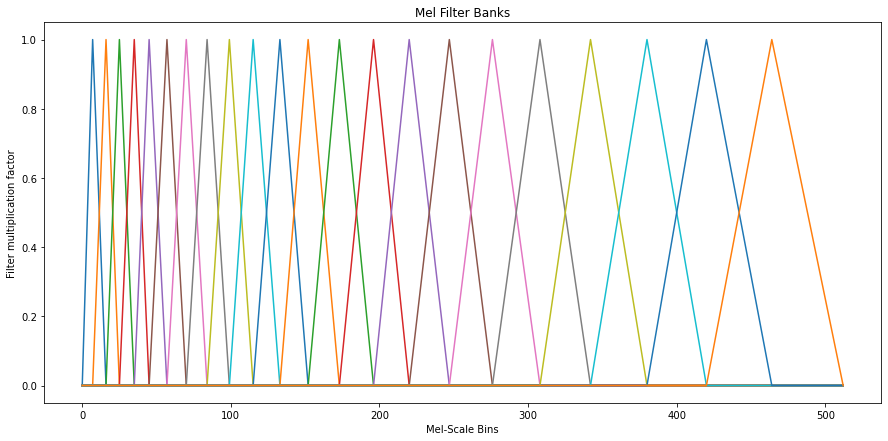

In [27]:
plt.figure(figsize=(15,7))
plt.plot(filter_banks.T)
plt.ylabel("Filter multiplication factor")
plt.xlabel("Mel-Scale Bins")
plt.title("Mel Filter Banks")
plt.show()

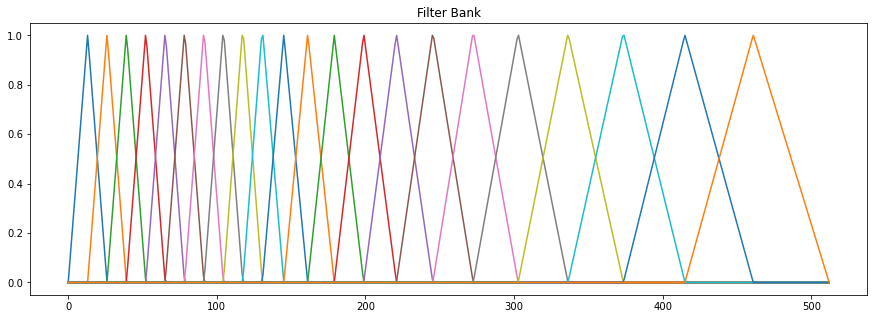

In [28]:
mels = librosa.filters.mel(sr=sr, n_fft=1024, n_mels=22,fmin=0, fmax= sr/2)
mels /= np.max(mels, axis=-1)[:, None]
plt.figure(figsize=(15,5))
plt.title("Filter Bank")
plt.plot(mels.T)

In [11]:
filter_bank =librosa.filters.mel(n_fft=200, sr=sr, n_mels=22)
filter_bank.shape 

(22, 101)

In [12]:
filter_bank[0:26,0:513]

array([[0.        , 0.00385042, 0.00770083, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00052862, 0.00026431,
        0.        ]], dtype=float32)

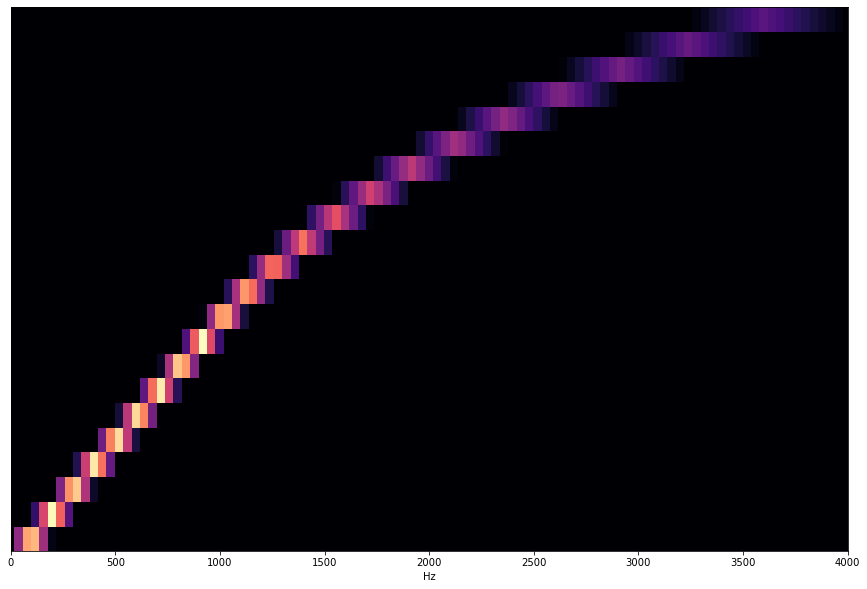

In [13]:
plt.figure(figsize=(15, 10))
librosa.display.specshow(filter_bank, sr=sr, x_axis="linear")
plt.show()

In [14]:
mel_spectrogram =librosa.feature.melspectrogram( y=y1 , n_fft=200, hop_length=80, n_mels=22)
mel_spectrogram.shape

(22, 3354)

In [15]:
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram,ref= np.max)
log_mel_spectrogram.shape

(22, 3354)

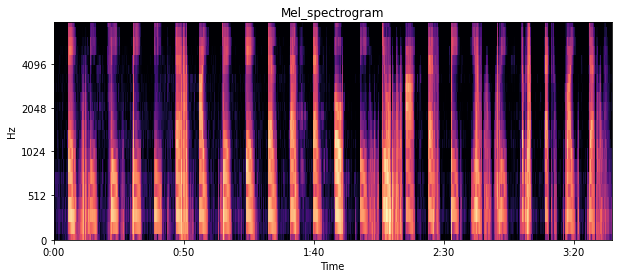

In [16]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(log_mel_spectrogram,fmax=8000 ,x_axis="time",y_axis="mel", sr=sr)
plt.title('Mel_spectrogram')
plt.show()


# MFCC 
( Mel. Frequency Cepstral Coefficient ) 
Mel-scale is perceptually relavant scale for pitch 

IMPORTANT FEATURES 
* identity of sound 
* phonems 
* timbres 
* formants 

## Computation of MFCC 
1) waveform(time-domain signal )

2) DFT 

3) log-amplitude Spectrum

4) mel-scaling (using mel-filter bank )

5) Discete cosine Transform

6) MFCC 

## How Many Coefficient 
* first 12-13 coefficient 
* first coeff. keep most info ( formants , spectral envelope )
* use delta & double delta MFCC ( 1st & 2nd order derivatives of MFCC Coeff. )
* Adding up , Total coeff. == 39 

### Function 
   var = librosa.feature.mfcc( signal , sampling rate , x_axis )
   It will return bi-demensional array (#COEFF. , # FRAMES )
   
   var1 =librosa.feature.delta(var, sampling rate , x_axis )
   
   DISPLAY 
   librosa.display.specshow( var/var1(bi-demsional array) , sampling rate , x-axis ) 
   

### Cepstrum 
c(x(t)) = inver F[log (F(x(t))] 
we are taking a spectrum specially a log-amp spectrum and then we are calculating "SPECTRUM OF A SPECTRUM " 

APPLICATION => PITCH DETECTION 

##### log spectrum (log power spectrum )
* continuous in nature 
* peridic structure are present 

## Vocal Tract 
   Its act as FILTER to the glottal pulse that are noisy voice (non-Speech ) signal 
   

# Cepstrum Coefficient 
    c(x(t)) = inver F[log (F(x(t))]
    power cepstrum of signal= ∣∣F−1{log(|F{x(t)}|^2)}∣∣^2,

Text(0, 0.5, 'Abs Magnitude')

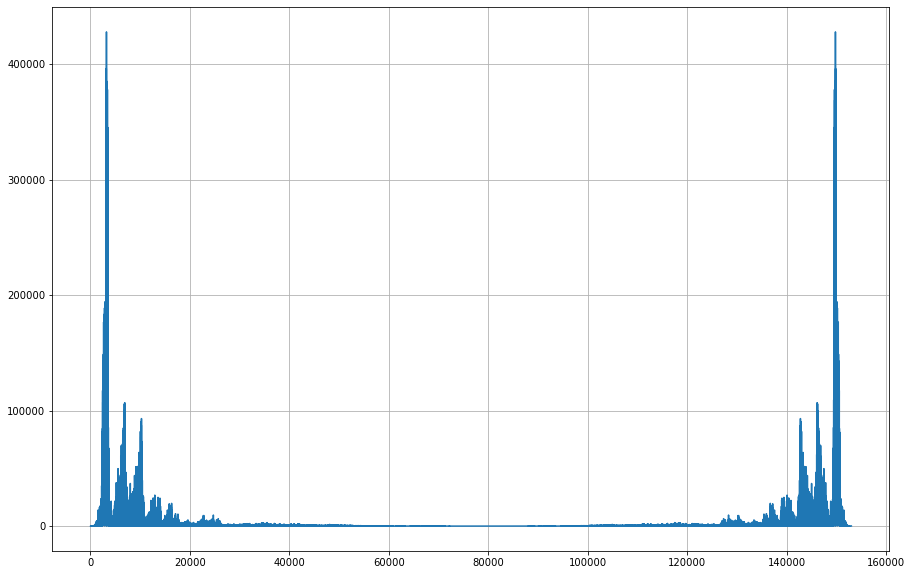

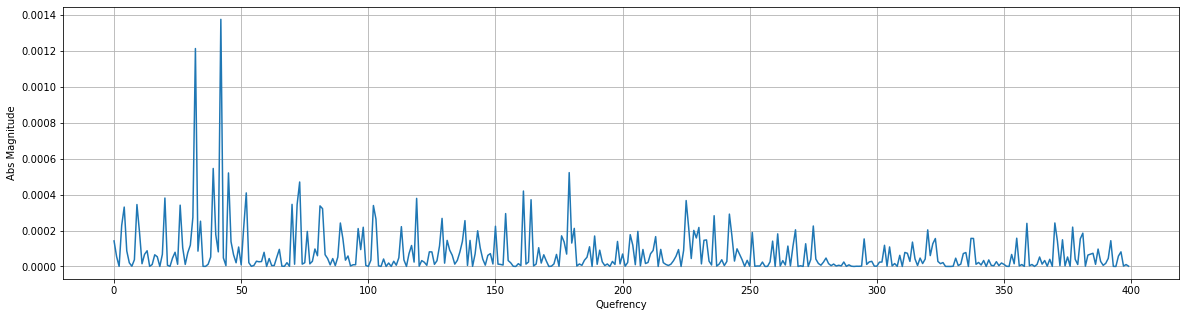

In [24]:
powerspectrum = np.abs(np.fft.fft(y1))**2
cepst = np.fft.ifft(np.log(powerspectrum))
cepst=np.abs(cepst)**2


plt.figure(figsize=(15, 10))
#plt.xlim(1000,5000)
plt.plot(powerspectrum)
plt.grid()

n0 = 100
n1 = 500
plt.figure(figsize=(20, 5))
plt.plot(cepst[n0:n1])
plt.grid()
plt.xlabel("Quefrency")
plt.ylabel("Abs Magnitude")

In [18]:
def get_delta_values(x):
    delta_x = np.zeros(shape=x.shape)
    for i in range(1,x.shape[1]-1):
        prev_val = x[:,i-1]
        next_val = x[:,i+1]
        
        delta_x[:,i]  = (next_val - prev_val)/2
    
    return delta_x

In [29]:
def mfcc(xn, sr, number_filters, window_size = 200, hopsize=80, fft_size=512):
    
    xn = preemphasis(xn)
        
    xn_stft = stft(xn, window_size= window_size, hopsize=hopsize, fft_size=fft_size)
    
    xn_mag = np.abs(xn_stft)
    
    xn_pow = get_power_spectrum(xn_mag, fft_size=fft_size)
    
    filter_banks = mel_filter_banks(xn_pow, sr, number_filters, fft_size=fft_size)
    
    machine_epsilon =  2.22044604925e-16
    
    filter_banks[filter_banks==0] = machine_epsilon
    
    filter_banks_res = np.dot(filter_banks, xn_pow.T)
    
    # Take log and the inverse DFT
    
    filter_banks_res = filter_banks_res + machine_epsilon
    
    log_filter_bank = np.log(filter_banks_res)
    
    idft = sp.fftpack.dct(log_filter_bank)
    
    # First 12 MFCC Values
    
    first_12 = idft[:12,:]
    
    # delta and delta-delta coefficients
    
    delta = get_delta_values(idft)
    
    delta_delta = get_delta_values(delta)
    
    # Getting Energy values of delta and delta-delta coefficients
    
    first_12_delta = delta[:12,:]
    
    first_12_delta_delta = delta_delta[:12,:]
    
    energy = np.sqrt(np.sum(np.power(first_12,2),axis=0)).reshape(1,-1)
    
    energy_delta = np.sqrt(np.sum(np.power(first_12_delta,2),axis=0)).reshape(1,-1)
    
    energy_delta_delta = np.sqrt(np.sum(np.power(first_12_delta_delta,2),axis=0)).reshape(1,-1)
    
    return np.vstack((energy, energy_delta, energy_delta_delta, first_12, first_12_delta, first_12_delta_delta)), filter_banks

In [30]:
mfcc_xn, filter_banks = mfcc(y1, sr, 40)

# MFCC

In [26]:
MFCC =librosa.feature.mfcc(y=y1 , n_mfcc=13 , sr=sr)
MFCC.shape 




(13, 299)

> 13 == Number of coefficient each FRAME   
> 525== Number of FRAMES 

In [27]:
MFCC[0:1,0:13]

array([[-491.96365 , -496.3116  , -499.91183 , -458.2168  , -175.14917 ,
         -79.613205,  -39.204773,  -34.3086  ,  -52.54958 , -102.22056 ,
        -185.98764 , -251.17296 , -320.2478  ]], dtype=float32)

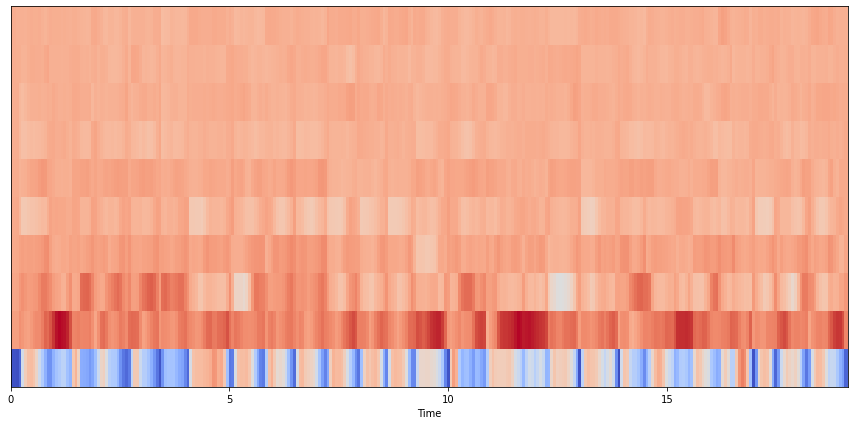

In [38]:
plt.figure(figsize=(15,7))
librosa.display.specshow( MFCC ,sr=sr, x_axis ="time"  )
plt.ylim((0,10))
plt.show()


# Delta Analysis 

In [29]:
D_MFCC1 = librosa.feature.delta(MFCC)
D_MFCC1[0:1,0:13]

array([[ 74.061386,  74.061386,  74.061386,  74.061386,  74.061386,
         65.036865,  43.56982 ,  12.285007, -24.275858, -43.691784,
        -51.95879 , -47.092762, -34.380215]], dtype=float32)

In [30]:
D_MFCC2 =librosa.feature.delta(MFCC, order =2)
D_MFCC2[0:1,0:13]

array([[ -4.332653 ,  -4.332653 ,  -4.332653 ,  -4.332653 ,  -4.332653 ,
        -24.782785 , -40.229202 , -40.45499  , -23.83786  , -15.302142 ,
         -4.5989423,   9.972609 ,  20.926863 ]], dtype=float32)

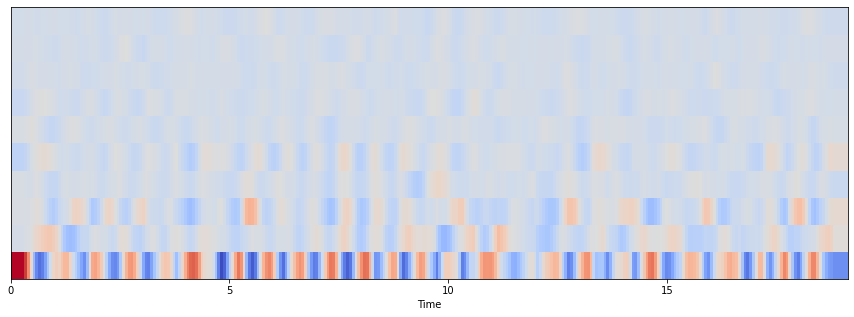

In [37]:
plt.figure(figsize=(15,5))
librosa.display.specshow(D_MFCC1 , x_axis="time", sr=sr )
plt.ylim((0,10))
plt.show()

In [32]:
D_MFCC2 =librosa.feature.delta(MFCC, order =2)

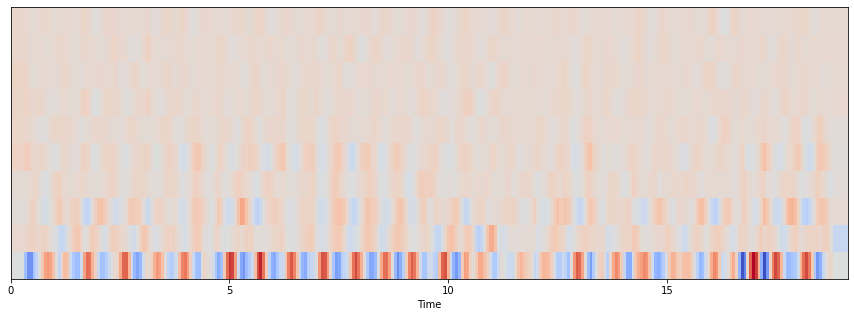

In [34]:
plt.figure(figsize=(15,5))
librosa.display.specshow(D_MFCC2 , x_axis="time", sr=sr )
plt.ylim((0,10))
plt.show()

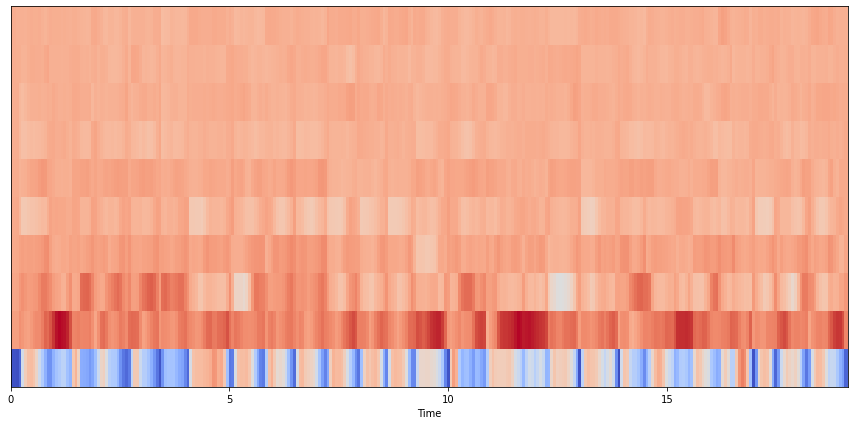

In [40]:
MFCC_CONC =np.concatenate((MFCC, D_MFCC1, D_MFCC2))
plt.figure(figsize=(15,7))
librosa.display.specshow(MFCC_CONC , x_axis="time", sr=sr )
plt.ylim((0,10))
plt.show()

In [70]:
mfcc_xn[[0,13]]

array([[ 9.18098804e+04,  1.79740381e+03,  1.55151117e+03, ...,
         4.57321336e+01,  1.32899007e+02,  5.96482787e+01],
       [-2.55937574e+04,  1.57341869e+00, -5.91215127e+02, ...,
        -1.73649607e+01, -2.33698534e+01,  9.39936730e+00]])

In [43]:
aa, sr = librosa.load(data,offset=0.5,duration=1,sr=8000)

ee, sr = librosa.load(data,offset=5.5,duration=1,sr=8000)

rr, sr = librosa.load(data,offset=21.5,duration=1,sr=8000)

tt, sr = librosa.load(data,offset=23,duration=1,sr=8000)

In [44]:
mfcc_aa = mfcc(aa, sr, 40)[0]

mfcc_ee = mfcc(ee, sr, 40)[0]

mfcc_rr = mfcc(rr, sr, 40)[0]

mfcc_tt = mfcc(tt, sr, 40)[0]

In [46]:
def get_avg_mfcc(mfcc_vector):
    return np.mean(mfcc_vector, axis=1)

In [47]:
mfcc_aa = get_avg_mfcc(mfcc_aa)
mfcc_ee = get_avg_mfcc(mfcc_ee)
mfcc_rr = get_avg_mfcc(mfcc_rr)
mfcc_tt = get_avg_mfcc(mfcc_tt)


In [48]:
features = np.vstack((mfcc_aa, mfcc_ee, mfcc_rr, mfcc_tt))

features.shape

(4, 39)

In [49]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(features)

print(kmeans.cluster_centers_)
print("no. of iter for converging =: ", kmeans.n_iter_)

[[184.86209733 111.42325324  81.18515133 -37.72371418 -35.16802615
  -32.08198821 -29.61098616 -29.46756113 -29.70106049 -30.89507584
  -30.04904148 -32.00529044 -32.88102728 -30.36491572 -29.25794938
   18.69316942  17.69202756  16.24750503  14.81089584  14.44202042
   15.19631355  15.21122634  14.60442327  15.01832814  15.59032779
   14.93505008  14.33974064  -7.54385779  -7.12493754  -6.32076557
   -5.38802306  -5.17450502  -5.74906311  -5.82067505  -5.35659511
   -5.52610319  -5.90636541  -5.78179241  -5.55273208]
 [192.85576347 102.39312607  60.62179805 -31.64285404 -30.63717645
  -26.34159652 -23.78835601 -25.57841603 -26.96834683 -23.30263278
  -24.6598932  -25.69205082 -23.68227351 -24.77467105 -22.36848213
   17.3841862   16.43531462  14.69876325  14.10253314  15.14196331
   14.86248432  14.4595129   14.89687615  15.05054206  15.31466379
   14.50035907  13.91094515 -10.44536692  -9.93747569  -9.24271405
   -8.87379664  -9.08037255  -9.08960549  -8.83164503  -8.79372611
   -9.1

In [50]:
kmeans.labels_

array([0, 0, 1, 2])

In [129]:
kmeans_kwargs = {
        "n_init": 2,
        "random_state": 0,
}
   
    # A list holds the SSE values for each k
sse = []
for k in range(1, 5):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)

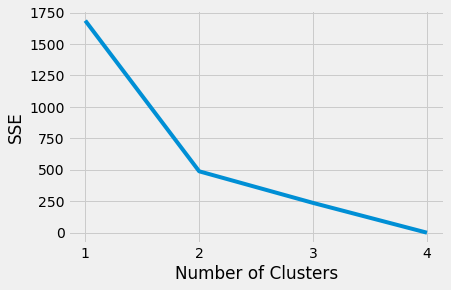

In [130]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 5), sse)
plt.xticks(range(1,5))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

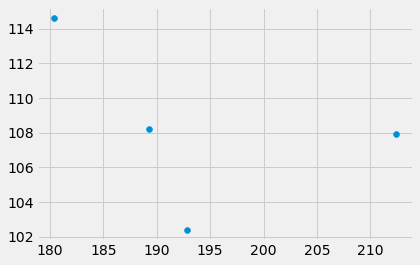

In [131]:
filtered_label0 = kmeans.labels_
 
#plotting the results
plt.scatter(features[:,0] , features[:,1] , label='True Position')
plt.show()

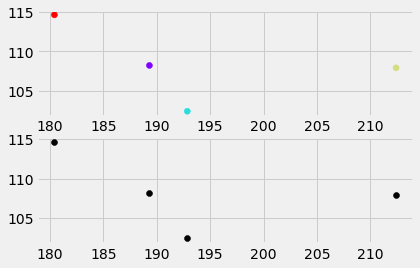

In [132]:
plt.subplot(2,1,1)
plt.scatter(features[:,0],features[:,1], c=kmeans.labels_, cmap='rainbow')

plt.subplot(2,1,2)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

# Pitch 
Pitch is an auditory sensation in which a listener assigns musical tones to relative positions on a musical scale based primarily on their perception of the frequency of vibration. Pitch is closely related to frequency, but the two are not equivalent. Frequency is an objective, scientific attribute that can be measured. Pitch is each person’s subjective perception of a sound wave, which cannot be directly measured. However, this does not necessarily mean that most people won’t agree on which notes are higher and lower.

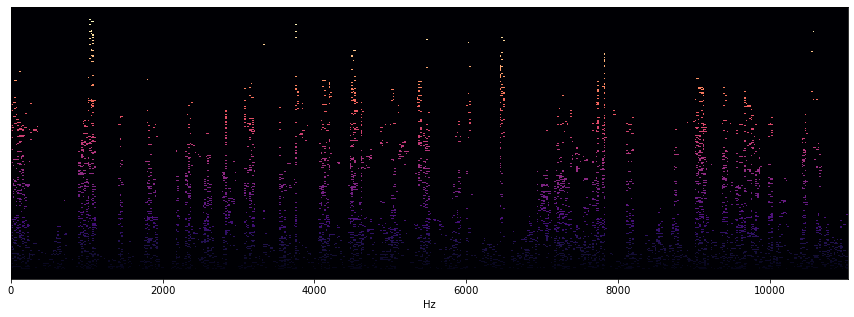

In [28]:
pitches, magnitudes = librosa.piptrack(y=y1, sr=sr)
plt.figure(figsize=(15,5))
librosa.display.specshow(pitches, x_axis='linear')

# Spectral_Roll_Off 

This is a measure of the amount of the right-skewedness of the power spectrum.The spectral roll off point is the fraction of bins in the power spectrum at which 85% of the power is at lower frequencies. That is, the roll-off is the frequency below which 85% of accumulated spectral magnitude is concentrated. Like the centroid, it takes on higher values for right-skewed spectra.

In [7]:
SRF, phase = librosa.magphase(librosa.stft(y1))
S=librosa.feature.spectral_rolloff(S=SRF, sr=sr)

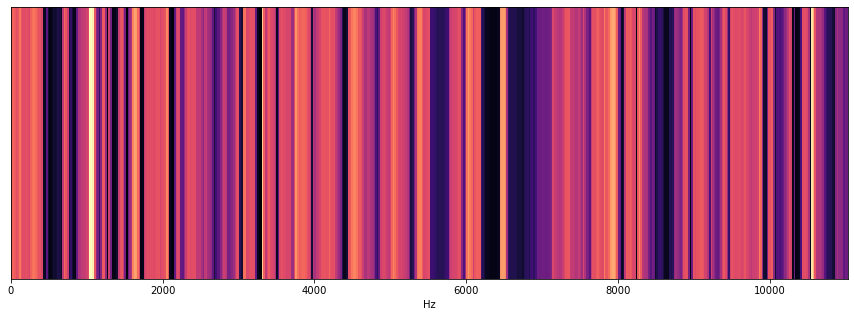

In [8]:
plt.figure(figsize=(15,5))
librosa.display.specshow(S, x_axis='linear')

## Spectral Feature 

    Spectral features are extracted from the spectrogram. Spectrograms offer a powerful representation of the data. It plots over the time, for a given range of frequencies, the power (dB) of a signal. This allows us to spot periodic patterns over time, and regions of activity.


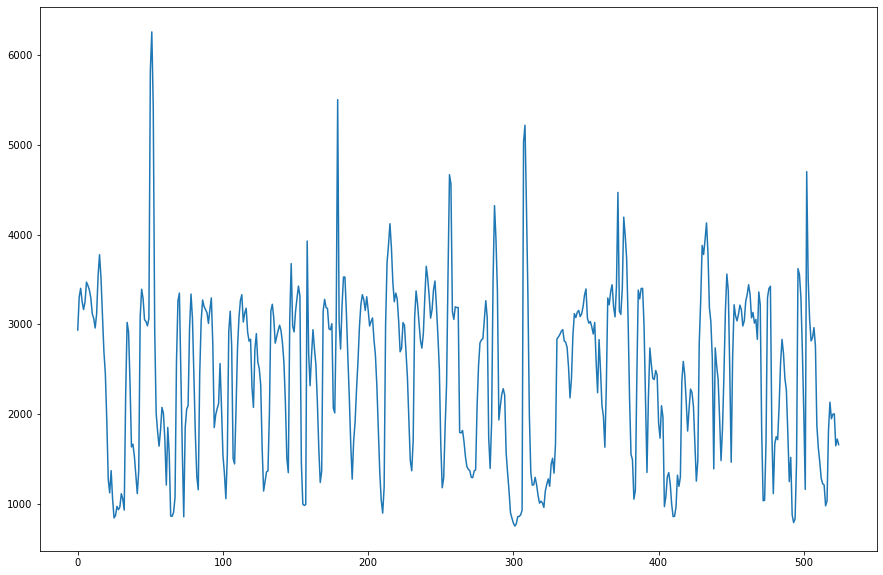

In [31]:
spec_centroid = librosa.feature.spectral_centroid(y1)[0]
plt.figure(figsize=(15,10))
plt.plot(spec_centroid)


In [32]:
spectral_bandwidth=librosa.feature.spectral_bandwidth(y1)[0]
print(spectral_bandwidth)

spectral_contrast=librosa.feature.spectral_contrast(y1)[0]
print(spectral_contrast)

spectral_flatness=librosa.feature.spectral_flatness(y1)[0]
print(spectral_flatness)

spectral_rolloff=librosa.feature.spectral_rolloff(y1)[0]
print(spectral_rolloff)




[2707.27082265 2782.20678567 2791.71615102 2754.81927627 2648.51498706
 2754.41349151 2895.96975046 2740.64888141 2607.82863279 2652.08635228
 2722.22698495 2706.32204056 2635.7170817  2872.83615261 2989.23688589
 2989.73959225 2967.15869053 2926.14310262 2815.48868207 2824.63695859
 2651.94670768 1997.88692799 1772.84348044 2166.72400948 1823.7815032
 1440.03112578 1174.60387386 1058.34409058  924.32881423  919.19865395
 1054.9985681  1044.45251354  933.03347723 2711.45675797 2945.51967778
 2900.05795098 2706.8866606  2466.48964186 2525.98851008 2430.49305917
 2246.51974989 1884.30164958 1963.25098023 2331.83703409 2220.65423764
 2379.77556178 2449.24318405 2482.7971148  2547.99965562 2645.56079135
 3341.12750215 3298.69713515 3295.78104145 2884.15024924 2196.10020461
 2112.3824856  2220.86563402 2550.21933432 2809.26663479 2797.30210386
 2583.11456875 2016.74410913 2558.28650035 2317.90942879 1443.82831585
 1374.49360197 1498.60650353 1772.05240106 2631.21966292 2666.21614391
 2766.4